# Fundamental diagrams

The nonlinearities inherent in traffic flow are captured by the so-called [fundamental diagrams](https://en.wikipedia.org/wiki/Fundamental_diagram_of_traffic_flow#/media/File:Fundamental_Diagram.PNG). However, these diagrams do not include occupancy, limiting their usefulness for this project. Try to re-make the fundamental diagrams from our data.

In [146]:
using CSV
using DataFrames
using Statistics
using KFactors
using Plots
using RawArray
using CategoricalArrays
using Printf

In [5]:
data = raread("../data/fundamental_diagram.ra");

In [6]:
# define human-readable names for axes
const SPEED = 1
const FLOW = 2
const DENS = 3

3

In [28]:
# resample an array to be smaller by averaging adjacent cells
function resample(array, blocksize)
    shp = ceil.(Int64, size(array) ./ blocksize)
    out = zeros(Float64, shp)
    
    for x in 1:shp[1]
        for y in 1:shp[2]
            xfr = (x - 1) * blocksize[1] + 1
            xto = min(x * blocksize[1], size(array)[1])
            yfr = (y - 1) * blocksize[2] + 1
            yto = min(y * blocksize[2], size(array)[2])
            out[x, y] = mean(@view array[xfr:xto, yfr:yto])
        end
    end
    
    out
end

resample (generic function with 1 method)

In [88]:
function toquantiles(vector, n; skipzero=false)
    if skipzero
        qvector = filter(x -> x != 0, reshape(vector, :))
    else
        qvector = reshape(vector, :)
    end
    # n + 1 b/c both 0 and 1 are in range, so 0:0.1:1 is 11 values
    probs = range(0, 1; length=n + 1)
    quantiles = quantile(qvector, probs)
    
    map(x -> probs[findfirst(x .≤ quantiles)], vector)
end

toquantiles (generic function with 1 method)

In [148]:
# insert commas in numbers
# https://stackoverflow.com/questions/52213829
function commas(num::Integer)
    str = string(num)
    return replace(str, r"(?<=[0-9])(?=(?:[0-9]{3})+(?![0-9]))" => ",")
end

commas (generic function with 1 method)

In [96]:
sampsize = sum(data)

6076309319

In [142]:
speed_flow = resample(dropdims(sum(data, dims=DENS), dims=DENS), (3, 20))
speed_flow = toquantiles(speed_flow, 20, skipzero=true);

In [143]:
speed_density = resample(dropdims(sum(data, dims=FLOW), dims=FLOW), (3, 2))
speed_density = toquantiles(speed_density, 20, skipzero=true);

In [144]:
dens_flow = resample(dropdims(sum(data, dims=SPEED), dims=SPEED), (20, 2))
dens_flow = toquantiles(dens_flow, 20, skipzero=true);

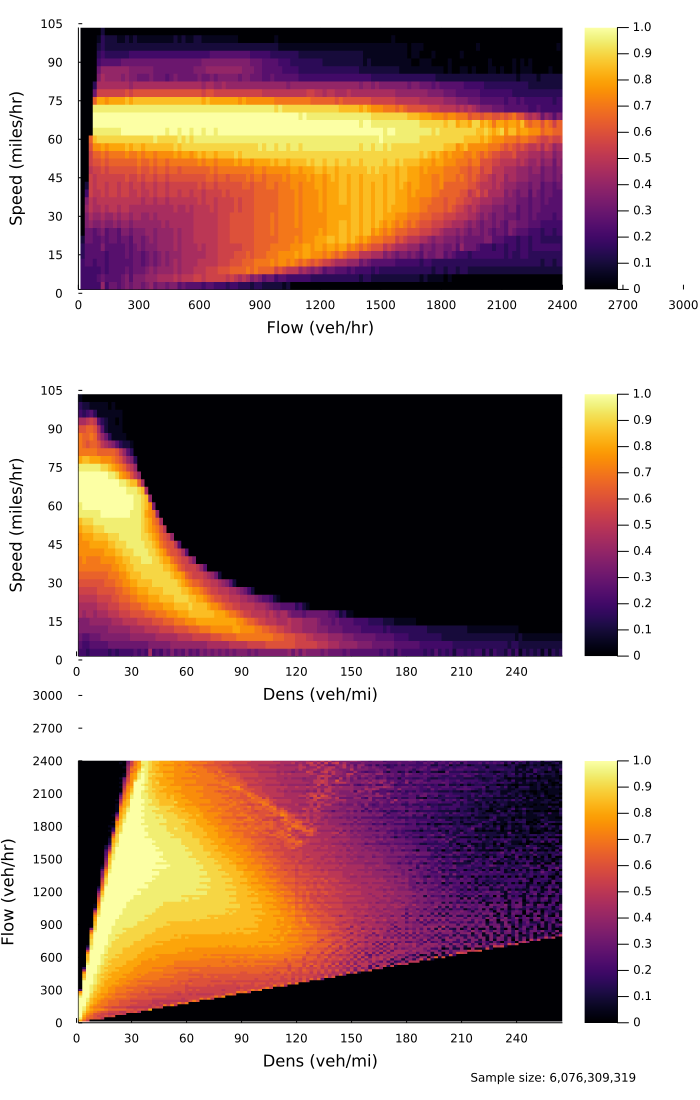

In [160]:
speed_flow_plot = heatmap(speed_flow, yticks=(0:5:35, (0:5:35) .* 3), xticks=(0:15:150, (0:15:150) .* 20))
xlabel!(speed_flow_plot, "Flow (veh/hr)")
xlims!(speed_flow_plot, 0, 2400 / 20)
ylabel!(speed_flow_plot, "Speed (miles/hr)")

speed_dens_plot = heatmap(speed_density, yticks=(0:5:35, (0:5:35) .* 3), xticks=(0:15:132, (0:15:132) .* 2))
xlabel!(speed_dens_plot, "Dens (veh/mi)")
ylabel!(speed_dens_plot, "Speed (miles/hr)")

dens_flow_plot = heatmap(dens_flow, yticks=(0:15:150, (0:15:150) .* 20), xticks=(0:15:132, (0:15:132) .* 2))
xlabel!(dens_flow_plot, "Dens (veh/mi)")
ylims!(0, 2400/20)
ylabel!(dens_flow_plot, "Flow (veh/hr)")
annotate!(dens_flow_plot, 130, -25, text("Sample size: $(commas(sampsize))", pointsize=8))

plot(speed_flow_plot, speed_dens_plot, dens_flow_plot, layout=grid(3, 1), size=(700, 1100), margin=5Plots.mm)


In [153]:
?font

search: font scalefontsize scalefontsizes resetfontsizes



```
font(args...)
```

Create a Font from a list of features. Values may be specified either as arguments (which are distinguished by type/value) or as keyword arguments.

# Arguments

  * `family`: AbstractString. "serif" or "sans-serif" or "monospace"
  * `pointsize`: Integer. Size of font in points
  * `halign`: Symbol. Horizontal alignment (:hcenter, :left, or :right)
  * `valign`: Symbol. Vertical aligment (:vcenter, :top, or :bottom)
  * `rotation`: Real. Angle of rotation for text in degrees (use a non-integer type)
  * `color`: Colorant or Symbol

# Examples

```julia-repl
julia> font(8)
julia> font(family="serif", halign=:center, rotation=45.0)
```


In [51]:
(0:5:35) .* 3

0:15:105